# Módulo 2 — Métricas estadísticas

## 2.1 Correlación
El coeficiente de correlación mide hasta qué punto la relación entre dos variables es lineal.  
Su valor siempre está entre $-1$ y $1$.  

- Un coeficiente positivo indica que las variables están directamente relacionadas, es decir, cuando una aumenta la otra también aumenta.  
- Un coeficiente negativo indica que las variables están inversamente relacionadas, de modo que cuando una aumenta la otra disminuye.  
- Cuanto más cercano a $0$ esté el coeficiente de correlación, más débil será la relación entre las variables.  

El coeficiente de correlación de dos series $X$ e $Y$ se define como:

$$
\rho_{X,Y} = \frac{\operatorname{Cov}(X,Y)}{\sigma_X \, \sigma_Y}
$$

donde $\operatorname{Cov}(X,Y)$ es la covarianza y $\sigma_X, \sigma_Y$ son las desviaciones estándar.  

Dos conjuntos aleatorios de datos tendrán un coeficiente de correlación cercano a $0$.


### Correlación vs. Covarianza

La correlación es simplemente una forma normalizada de la covarianza.  
Por lo demás, son lo mismo y a menudo se utilizan de manera casi intercambiable en conversaciones cotidianas.  
Es importante ser preciso con el lenguaje al hablar de ambas, pero conceptualmente son casi idénticas.  

### La covarianza no es tan significativa por sí sola

Supongamos que tenemos dos variables $X$ e $Y$ y calculamos la covarianza entre ellas.


In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
X = np.random.rand(50)
Y = 2 * X + np.random.normal(0, 0.1, 50)

np.cov(X, Y)[0, 1]

In [ ]:
X = np.random.rand(50)
Y = 2 * X + 4

print ('Covariance of X and Y: \n' + str(np.cov(X, Y)))
print ('Correlation of X and Y: \n' + str(np.corrcoef(X, Y)))

### ¿Por qué tanto `np.cov` como `np.corrcoef` devuelven matrices?

La **matriz de covarianza** es un concepto importante en estadística.  
A menudo la gente se refiere a la covarianza de dos variables $X$ e $Y$, pero en realidad eso es solo una entrada dentro de la matriz de covarianza de $X$ e $Y$.  

- Para cada variable de entrada tenemos una fila y una columna.  
- La diagonal corresponde a la varianza de esa variable, es decir, $\sigma^2$.  
- Las entradas fuera de la diagonal son las covarianzas entre diferentes variables.  
- La matriz es simétrica con respecto a la diagonal.  

Vamos a comprobar que esto es cierto.


In [ ]:
cov_matrix = np.cov(X, Y)

# We need to manually set the degrees of freedom on X to 1, as numpy defaults to 0 for variance
# This is usually fine, but will result in a slight mismatch as np.cov defaults to 1
error = cov_matrix[0, 0] - X.var(ddof=1)

print ('error: ' + str(error))

In [ ]:
X = np.random.rand(50)
Y = np.random.rand(50)

plt.scatter(X,Y)
plt.xlabel('X Value')
plt.ylabel('Y Value')

# taking the relevant value from the matrix returned by np.cov
print ('Correlation: ' + str(np.cov(X,Y)[0,1]/(np.std(X)*np.std(Y))))
# Let's also use the builtin correlation function
print ('Built-in Correlation: ' + str(np.corrcoef(X, Y)[0, 1]))

Veamos ahora cómo son dos variables positivamente correladas:

In [ ]:

X = np.random.rand(50)
Y = X + np.random.normal(0, 0.1, 50)

plt.scatter(X,Y)
plt.xlabel('X Value')
plt.ylabel('Y Value')

print ('Correlation: ' + str(np.corrcoef(X, Y)[0, 1]))

Podemos reducir esta correlación añadiendo ruido:

In [ ]:

X = np.random.rand(50)
Y = X + np.random.normal(0, .2, 50)

plt.scatter(X,Y)
plt.xlabel('X Value')
plt.ylabel('Y Value')

print ('Correlation: ' + str(np.corrcoef(X, Y)[0, 1]))

Finalmente, observamos dos variables con correlación negativa:

Correlation: -0.9528762568321624


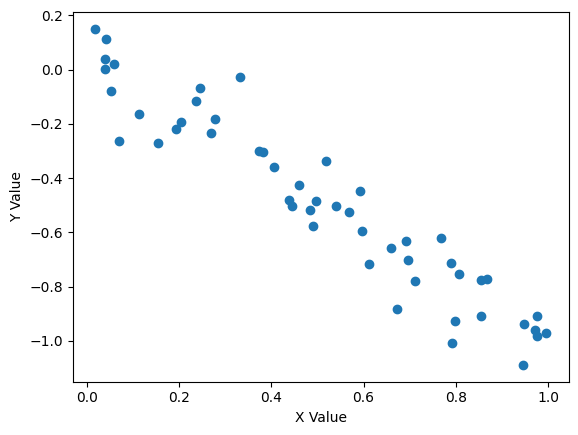

In [9]:
X = np.random.rand(50)
Y = -X + np.random.normal(0, .1, 50)

plt.scatter(X,Y)
plt.xlabel('X Value')
plt.ylabel('Y Value')

print ('Correlation: ' + str(np.corrcoef(X, Y)[0, 1]))

### ¿Cómo es esto útil en finanzas?

#### Determinar activos relacionados

Una vez que hemos establecido que dos series probablemente están relacionadas, podemos usar esa información para intentar predecir valores futuros de la serie.  

#### Construcción de un portafolio de activos no correlacionados

Otra razón por la que la correlación es útil en finanzas es que los activos no correlacionados producen los mejores portafolios.  
La intuición detrás de esto es que, si los activos no están correlacionados, una caída en uno no corresponderá con una caída en otro.  
Esto conduce a una corriente de retornos mucho más estable cuando se combinan muchos activos no correlacionados.  

---

### Limitaciones

#### Significancia

Es difícil determinar de manera rigurosa si una correlación es significativa, especialmente cuando, como en este caso, las variables no están distribuidas normalmente.  
Su coeficiente de correlación está cerca de $1$, por lo que es bastante seguro decir que los dos precios de las acciones están correlacionados en el período de tiempo que usamos.  
Pero, ¿es esto indicativo de una correlación futura?  

Un problema fundamental es que es fácil **sobreajustar correlaciones** escogiendo el período de tiempo adecuado.  
Para evitar esto, se debe calcular la correlación de dos variables en **muchos períodos históricos** y examinar la distribución del coeficiente de correlación.  

Más detalles sobre por qué las estimaciones de un único punto son poco fiables se cubrirán en futuros notebooks.  

---



Correlation coefficients
LRCX and AAPL:  0.9595011881844739
LRCX and SPY:  0.9390678167405037
AAPL and SPY:  0.9078499583673406


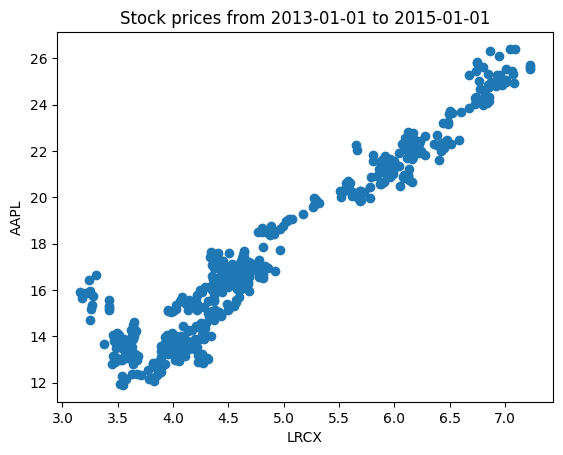

In [19]:
import yfinance as yf

start = '2013-01-01'
end = '2015-01-01'
aapl= yf.Ticker("aapl")
lrcx= yf.Ticker("lrcx")
bench=yf.Ticker("spy")

bench= bench.history(start=start, end=end, interval="1d")['Close']
a1= lrcx.history(start=start, end=end, interval="1d")['Close']
a2= aapl.history(start=start, end=end, interval="1d")['Close']

plt.scatter(a1,a2)
plt.xlabel('LRCX')
plt.ylabel('AAPL')
plt.title('Stock prices from ' + start + ' to ' + end)
print ("Correlation coefficients")
print ("LRCX and AAPL: ", np.corrcoef(a1,a2)[0,1])
print ("LRCX and SPY: ", np.corrcoef(a1,bench)[0,1])
print ("AAPL and SPY: ", np.corrcoef(bench,a2)[0,1])

Text(0, 0.5, '60-day Rolling Correlation')

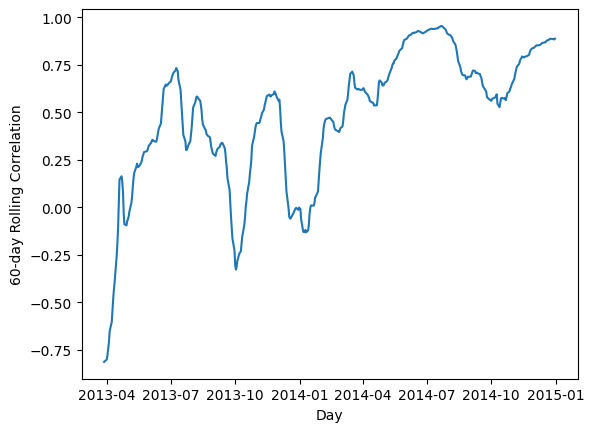

In [24]:
rolling_correlation = a1.rolling(window=60).corr(a2)
plt.plot(rolling_correlation)
plt.xlabel('Day')
plt.ylabel('60-day Rolling Correlation')

### Relaciones no lineales

El coeficiente de correlación puede ser útil para examinar la fuerza de la relación entre dos variables.  
Sin embargo, es importante recordar que dos variables pueden estar asociadas de diferentes maneras predecibles que este análisis no detectaría.  

- Por ejemplo, una variable podría seguir de manera precisa el comportamiento de otra, pero con un **desfase temporal**.  
  Existen técnicas para tratar con esta correlación retardada.  
- Alternativamente, una variable puede estar relacionada con la **tasa de cambio** de otra.  

Ninguna de estas relaciones es lineal, pero pueden ser muy útiles si se detectan.  

Además, el coeficiente de correlación puede ser muy sensible a los **valores atípicos** (*outliers*).  
Esto significa que incluir o excluir incluso un par de puntos de datos puede alterar el resultado, y no siempre está claro si estos puntos contienen información o son simplemente ruido.  





np.float64(0.2317292256781955)

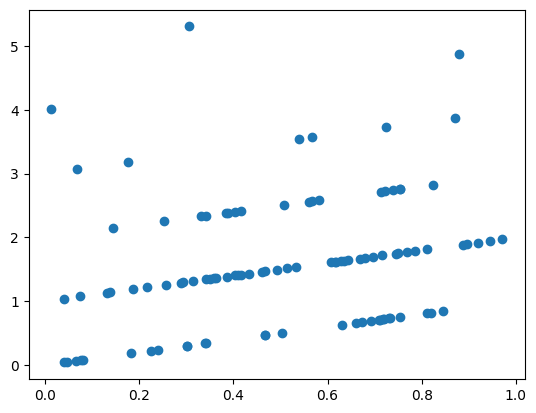

In [25]:
	
X = np.random.rand(100)
Y = X + np.random.poisson(size=100)

plt.scatter(X, Y)

np.corrcoef(X, Y)[0, 1]

## 2.2 — Parámetros

Un **parámetro** es cualquier valor que un modelo utiliza para restringir sus predicciones.  
Comúnmente, un parámetro es una cantidad que ayuda a describir un conjunto de datos o una distribución.  

Por ejemplo, la **media** de una distribución normal es un parámetro; de hecho, decimos que una normal está parametrizada por su media y su varianza.  
Si calculamos la media de un conjunto de muestras tomadas de la distribución normal, obtenemos una **estimación** de la media de la distribución.  
De manera similar, la media de un conjunto de observaciones es una estimación del parámetro de la distribución subyacente (que a menudo se supone normal).  

Otros ejemplos de parámetros incluyen:  
- la **mediana**,  
- el **coeficiente de correlación** con otra serie,  
- la **desviación estándar**,  
- y cualquier otra medida de un conjunto de datos.  

---

### Nunca lo conoces, solo lo estimas

Cuando calculas la media de un conjunto de datos, **no conoces la media real**.  
Solo has estimado la media lo mejor posible a partir de los datos que tienes.  

La estimación puede estar equivocada, y esto es cierto para cualquier parámetro que intentes estimar.  
Para entender realmente lo que ocurre, necesitas determinar **qué tan buena es tu estimación**, observando su **estabilidad / error estándar / intervalos de confianza**.  

---

### Inestabilidad de las estimaciones

Siempre que consideramos un conjunto de observaciones, nuestro cálculo de un parámetro solo puede ser una **estimación**.  
Esta cambiará a medida que tomemos más mediciones o conforme pase el tiempo y obtengamos nuevas observaciones.  

Podemos cuantificar la incertidumbre de una estimación analizando cómo cambia el parámetro al observar **diferentes subconjuntos de los datos**.  

Por ejemplo:  
- La **desviación estándar** describe cuánto difiere la media de un conjunto respecto a la media de cada observación, es decir, respecto a cada dato en sí.  
- En aplicaciones financieras, los datos suelen venir en forma de **series temporales**.  
- En este caso, podemos estimar un parámetro en distintos momentos; por ejemplo, para los últimos **30 días**.  

Al observar cuánto fluctúa esta **estimación móvil** cuando cambiamos la ventana temporal, podemos calcular la **inestabilidad del parámetro estimado**.


In [ ]:
np.random.seed(123)

normal = np.random.randn(500)
print (np.mean(normal[:10]))
print (np.mean(normal[:100]))
print (np.mean(normal[:250]))
print (np.mean(normal))

# Plot a stacked histogram of the data
plt.hist([normal[:10], normal[10:100], normal[100:250], normal], normed=1, histtype='bar', stacked=True)
plt.ylabel('Frequency')
plt.xlabel('Value')

In [ ]:
print (np.std(normal[:10]))
print (np.std(normal[:100]))
print (np.std(normal[:250]))
print (np.std(normal))

### Precisión y significancia de las estimaciones

Observa que, aunque la probabilidad de que la media se acerque a $0$ y la desviación estándar a $1$ aumenta con el número de muestras, **no siempre obtenemos mejores estimaciones al tomar más datos**.  

Sea cual sea nuestra expectativa, siempre podemos obtener un resultado diferente, y nuestro objetivo suele ser **calcular la probabilidad de que el resultado sea significativamente distinto de lo esperado**.


### Prueba de normalidad: Jarque-Bera

Vamos a **probar nuestros datos** usando la **prueba de Jarque-Bera** para verificar si siguen una distribución normal.  

- Un **valor p significativo** indica que los datos **no son normales**.


In [ ]:
from statsmodels.stats.stattools import jarque_bera

jarque_bera(X)

### Ejemplo: Ratio de Sharpe

Una estadística que se utiliza con frecuencia para describir el rendimiento de activos y portafolios es el **ratio de Sharpe**, que mide el **retorno adicional por unidad de riesgo adicional** logrado por un portafolio, en relación con una fuente de retorno libre de riesgo como los **Treasury bills**:

$$
S = \frac{R - R_f}{\sigma_R}
$$

donde:  
- $R$ son los **retornos del activo**,  
- $R_f$ es la **tasa de retorno libre de riesgo**,  
- $\sigma_R$ es la **desviación estándar de los retornos**.  

Al igual que con la media y la desviación estándar, podemos calcular un **Sharpe ratio móvil** para observar cómo cambia nuestra estimación a lo largo del tiempo.


Text(0, 0.5, 'Sharpe Ratio')

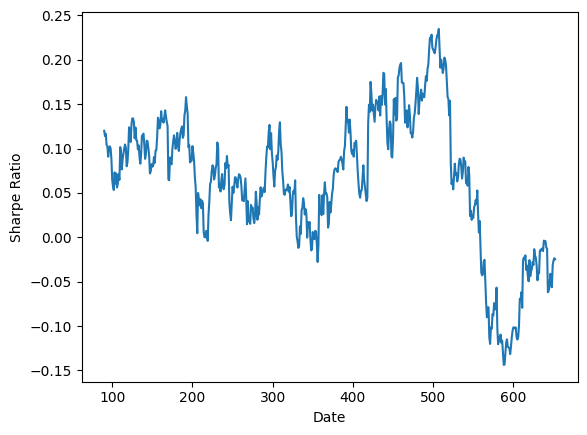

In [30]:
def sharpe_ratio(asset, riskfree):
    return np.mean(asset - riskfree)/np.std(asset - riskfree)

start = '2012-01-01'
end = '2015-01-01'
# Use an ETF that tracks 3-month T-bills as our risk-free rate of return
bil= yf.Ticker("bil")
amzn=yf.Ticker("amzn")
treasury_ret = bil.history(start=start, end=end, interval="1d")['Close'].pct_change()[1:]
returns= amzn.history(start=start, end=end, interval="1d")['Close'].pct_change()[1:]


# Compute the running Sharpe ratio
running_sharpe = [sharpe_ratio(returns[i-90:i], treasury_ret[i-90:i]) for i in range(90, len(returns))]

# Plot running Sharpe ratio up to 100 days before the end of the data set
_, ax1 = plt.subplots()
ax1.plot(range(90, len(returns)-100), running_sharpe[:-100])
ticks = ax1.get_xticks()
plt.xlabel('Date')
plt.ylabel('Sharpe Ratio')